In [1]:
import tensorflow as tf
import tensorflow_hub as hub
print("GPU Available" if tf.config.list_physical_devices("GPU") else "Not available")

GPU Available


# getting our data ready i.e. turning into tensors

With All Ml models, our data has to be in numeric format.
Turning images to tensors(numerical representations).

In [2]:
import pandas as pd

In [3]:
labels=pd.read_csv("Data/dog-breed-identification/labels.csv")
print(labels.describe)

<bound method NDFrame.describe of                                      id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]>


In [4]:
labels.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     e4245709e4060e08146b5fe1af72385d  scottish_deerhound
freq                                   1                 126

In [5]:
labels.head(5)

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [158]:
# Images of each breed
pd.set_option('display.max_rows',20)
labels.breed.value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
golden_retriever         67
brabancon_griffon        67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

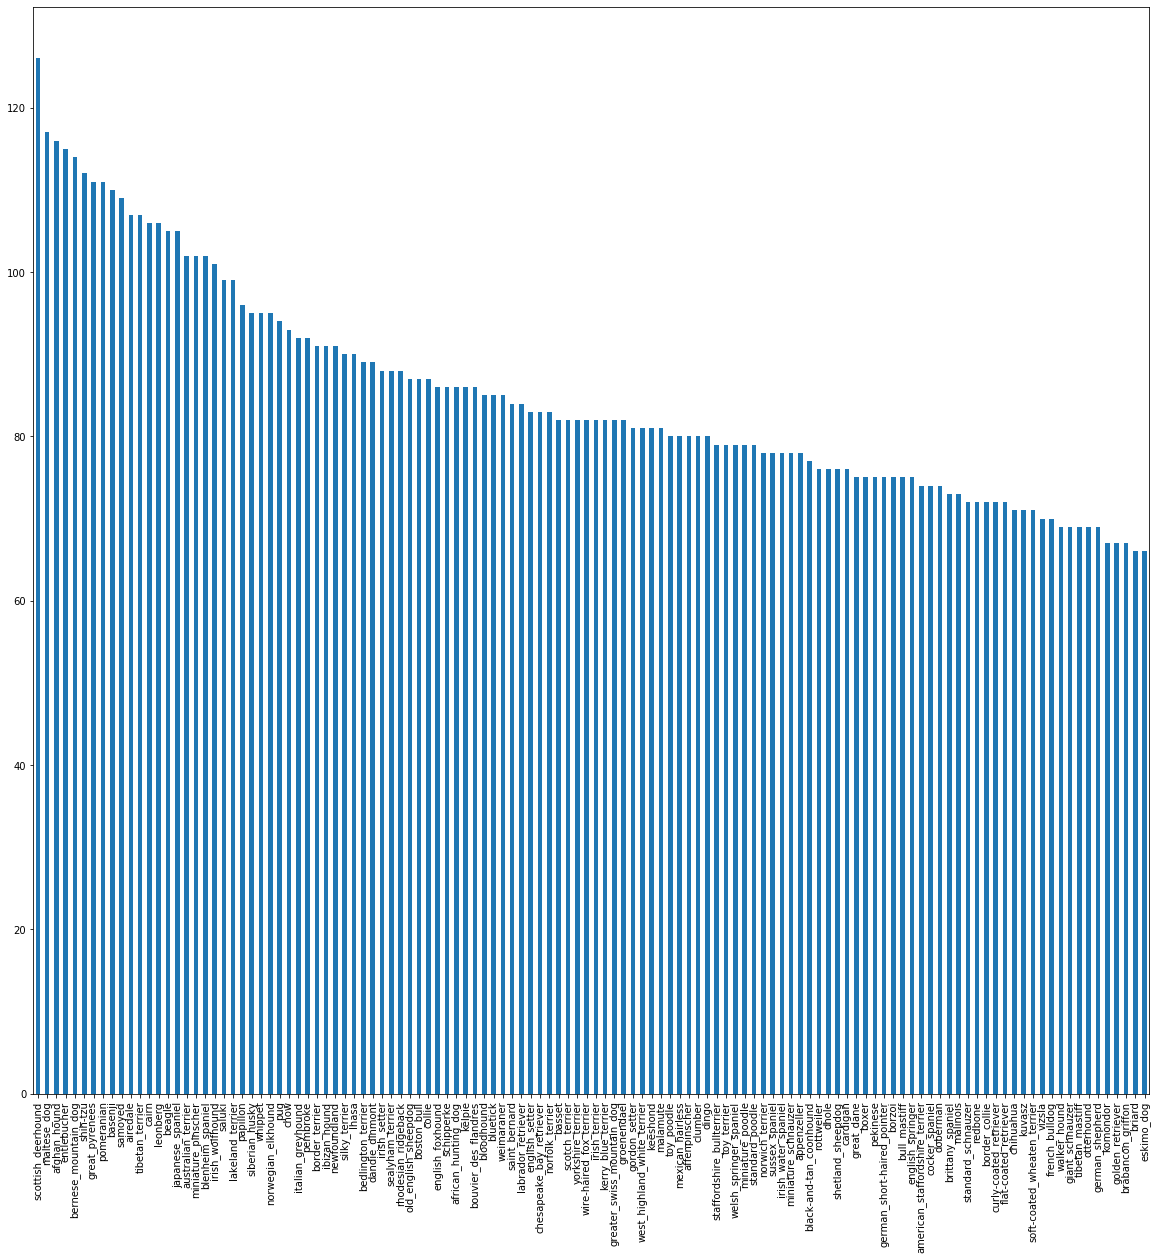

In [7]:
labels.breed.value_counts().plot.bar(figsize=(20,20));

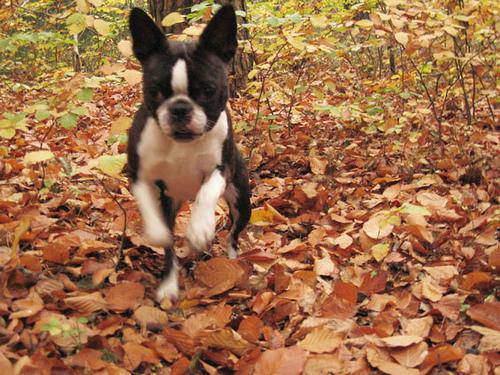

In [8]:
# Let's view an image 
from IPython.display import Image
Image(data="Data/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg")    
      

## Getting images and theri LAbels

Let's get a list of image file pathnames.

In [9]:
# Create pathnames from image id's 
filenames=[fname for fname in labels.id]

filenames

['000bec180eb18c7604dcecc8fe0dba07',
 '001513dfcb2ffafc82cccf4d8bbaba97',
 '001cdf01b096e06d78e9e5112d419397',
 '00214f311d5d2247d5dfe4fe24b2303d',
 '0021f9ceb3235effd7fcde7f7538ed62',
 '002211c81b498ef88e1b40b9abf84e1d',
 '00290d3e1fdd27226ba27a8ce248ce85',
 '002a283a315af96eaea0e28e7163b21b',
 '003df8b8a8b05244b1d920bb6cf451f9',
 '0042188c895a2f14ef64a918ed9c7b64',
 '004396df1acd0f1247b740ca2b14616e',
 '0067dc3eab0b3c3ef0439477624d85d6',
 '00693b8bc2470375cc744a6391d397ec',
 '006cc3ddb9dc1bd827479569fcdc52dc',
 '0075dc49dab4024d12fafe67074d8a81',
 '00792e341f3c6eb33663e415d0715370',
 '007b5a16db9d9ff9d7ad39982703e429',
 '007b8a07882822475a4ce6581e70b1f8',
 '007ff9a78eba2aebb558afea3a51c469',
 '008887054b18ba3c7601792b6a453cc3',
 '008b1271ed1addaccf93783b39deab45',
 '008ba178d6dfc1a583617470d19c1673',
 '009509be3ca7cce0ff9e37c8b09b1125',
 '0097c6242c6f3071762d9f85c3ef1b2f',
 '00a338a92e4e7bf543340dc849230e75',
 '00a366d4b4a9bbb6c8a63126697b7656',
 '00a862390341c5be090dd72bd2bc19ef',
 

In [10]:
filenames=["Data/dog-breed-identification/train/"+fname+".jpg" for fname in labels.id]

filenames

['Data/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'Data/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'Data/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'Data/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'Data/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'Data/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'Data/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'Data/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'Data/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'Data/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'Data/dog-breed-identification/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'Data/dog-breed-identification/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 'Data/dog-breed-identification/train/00693b8bc2470375cc744a6391d397ec.jpg',

In [11]:
# Check whether the number of filenames matches number of actual image files
import os
if len(os.listdir("Data/dog-breed-identification/train/")) == len(filenames):
    print("Filenames amount same")
else:
    print("Filenames missing")

Filenames amount same


In [12]:
os.listdir("Data/dog-breed-identification/train/")[:10]

['000bec180eb18c7604dcecc8fe0dba07.jpg',
 '001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '001cdf01b096e06d78e9e5112d419397.jpg',
 '00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '002211c81b498ef88e1b40b9abf84e1d.jpg',
 '00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '002a283a315af96eaea0e28e7163b21b.jpg',
 '003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '0042188c895a2f14ef64a918ed9c7b64.jpg']

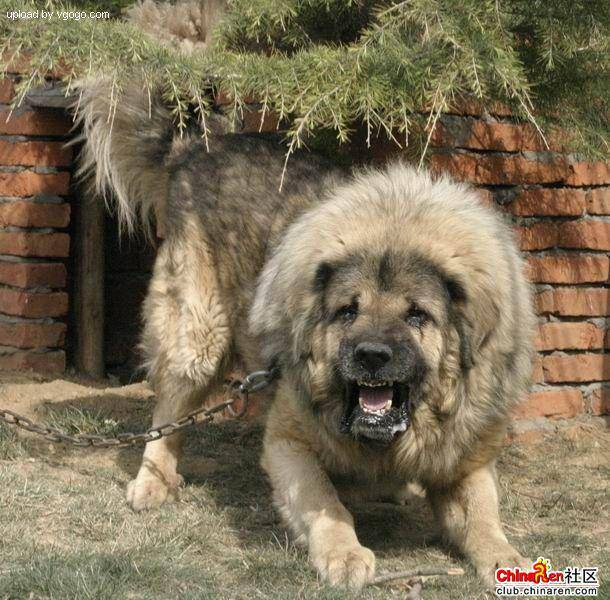

In [13]:
 Image(filenames[9000])

In [14]:
labels.breed[9000]

'tibetan_mastiff'

### Prepare our Labels

In [15]:
breed=labels.breed

In [16]:
breed[:10]

0           boston_bull
1                 dingo
2              pekinese
3              bluetick
4      golden_retriever
5    bedlington_terrier
6    bedlington_terrier
7                borzoi
8               basenji
9    scottish_deerhound
Name: breed, dtype: object

In [17]:
import numpy as np

In [18]:
breed=np.array(breed)
# breed=labels.breed.to_numpy same

In [19]:
breed

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [20]:
if len(breed) ==len(filenames):
    print("Same")

Same


In [21]:
breed.dtype

dtype('O')

In [22]:
# Unique labels
breed_unique=np.unique(breed)

In [23]:
breed_unique

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [24]:
len(breed_unique)

120

In [25]:
# to convert array into booleans

print(breed[0])
breed[0] == breed_unique

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [26]:
# turn every breed into a boolean array
boolean_array=[breeds == breed_unique for breeds in breed]
boolean_array[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [27]:
len(boolean_array)

10222

In [28]:
print(breed[0])
print(np.where(breed_unique == breed[0])) # index where breed occurs
print(boolean_array[0].argmax()) # index where breed occurs in boolean array
print(boolean_array[0].astype(int)) # there will be 1 where the sample breed occurs

boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [29]:
print(np.where(breed_unique == breed[0]))

(array([19], dtype=int64),)


In [30]:
print(boolean_array[0].argmax())

19


In [31]:
print(boolean_array[0].astype(int))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [32]:
boolean_array

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [33]:
# Setup X and y variables
X=filenames
y=boolean_array

Starting with 1000 images

In [159]:
# Set number of images to start experimenting
Num_images= 1000 #@param {type="slider", min=1000,max=10000,step=1000} in googlecolab

In [35]:
# %conda install scikit-learn

In [36]:
# Split the data into train and validation set
from sklearn.model_selection import train_test_split
# split the data into training and validation
X_train,X_val,y_train,y_val=train_test_split(X[:Num_images],y[:Num_images],test_size=0.3,random_state=42)

len(X_train),len(X_val),len(y_train),len(y_val)

(700, 300, 700, 300)

In [37]:
X_train[:2]

['Data/dog-breed-identification/train/0d579f92d60935a54aa6dba6e6213257.jpg',
 'Data/dog-breed-identification/train/0a7f8d31c960071d0d4cfba36c0159c7.jpg']

In [38]:
y_train[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

## Preprocessing Images
 ## Turning Images to tensors
 
 To preprocess our images into TENSORS we're going to write a function which does a few things:
 1. Take an image filepath as input
 2. Use tensorflow to read the file and save it to a variable `image` 
 3. Turn our `image` into a tensor
 4. Resize the image to (224,224)
 5. Return the modified `image`
 
 Tensorflow Load data documentation: https://www.tensorflow.org/tutorials/load_data/images

In [39]:
# %pip install pillow

In [40]:
# Convert image to numpy array
from matplotlib.pyplot import imread
image=imread(filenames[42])
image.shape

(257, 350, 3)

In [41]:
image

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]

In [42]:
image.max(),image.min()

(255, 0)

In [43]:
tf.constant(image) # convert to a tensor 

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

In [44]:
# Image size
IMG_SIZE=224

# create a function to preprocess image
def process_image(image_path):
    """
    Takes an image file path and turns it into a Tensor.
    """
    
    # Read an image file
    image=tf.io.read_file(image_path)
    # turn the jpeg into numerical tensor with 3 colour channels (R,G,B)
    image=tf.image.decode_jpeg(image,channels=3)
    # Convert the data channel values from 0-255 to 0-1
    image=tf.image.convert_image_dtype(image,tf.float32)
    # Resize the image to our desired values
    image=tf.image.resize(image,size=(IMG_SIZE,IMG_SIZE))
    
    return image

## Turning our data into batches
Batches our important because they distribute our data into best of their forms. the preferred length of batches is 32.
In order to use Tensorflow effectively, we need our data in the form of tensor tuples which look like this:
`(image.,label)`.

Batches work differently for training,validation and testing datasets.

In [45]:
# Create a simple function to return a tuple(image,label)
def get_image_label(image_path,label):
    """
    Takes an image file path name and the associated label, processes the image and returns a tuple of(`image,label`)
    Our case breed
    """
    image=process_image(image_path)
    return image,label

In [46]:
(process_image(X[42]),tf.constant(y[42])) #convert array to tuple of tensor

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

## Turn our data into tuples of tensors in the form `(image,label)` and into batches

In [47]:
# define the size of batch as 32
BATCH_SIZE=32

# Create a function to turn data into batches
def create_data_batches(X,y=None, batch_size=BATCH_SIZE,valid_data=False, test_data=False):
    """
    Creates batches of data out of image (X) and label (Y) pairs.
    Shuffles the data if it's a training data but doesn't shuffle if it's a validation data.
    Also accepts test data as input (No labels)
    """
    # If the data is a test dataset, we probably don't have labels
    
    if test_data:
        print("Creating test data batches...")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(X))) #only filepaths (no labels)
        data_batch = data.map(process_image).batch(batch_size)    #give me tensors I will create batches for u
        print("Completed Test data...")
    # If the data is a valid dataset, we don't have to shuffle it 
    elif valid_data:
        print("Creating valid data batches...")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y))) # filepaths and labels
        data_batch = data.map(get_image_label).batch(batch_size)    #give me tensors I will create batches for u
        print("Completed valid data...")        
    else:
        print("Creating training data batches...")
        # Turn filepaths and labels into tensors
        data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y))) # filepaths and labels
        # Shuffling pathnames and labels rather than images because it saves time 
        data=data.shuffle(buffer_size=len(X))
        # Create (image,label) tuples (this also turns the image path into a preprocessed image)
        data=data.map(get_image_label)
        # turn the training data into batches
        data_batch = data.batch(batch_size)    #give me tensors I will create batches for u
        print("Completed Training data...")
    
    return data_batch

In [48]:
# Creating training and validation data batches
train_data=create_data_batches(X_train,y_train)
val_data=create_data_batches(X_val,y_val,valid_data=True)

Creating training data batches...
Completed Training data...
Creating valid data batches...
Completed valid data...


In [49]:
train_data.element_spec, val_data.element_spec

# """
# Output:
# 1st Line 
# Training data images: None is the batch size, Size , channels
# 2nd line 
# Training data labels None eis batch size, len(y[0])
# 3rd and 4th line similar for the validation set
# """

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [50]:
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

## Visualizing our data batches.

Our data is now in batches but difficult to understand... So let's try to visualize it.

In [51]:
import matplotlib.pyplot as plt

#Create  a function for viewing images in a data breach
def show_25_images(images,labels):
    """
    Displays 25 images and their labels from a data batch.
    """
    
    # Setup the figure
    plt.figure(figsize=(10,10))
    # Loop through 25 images
    for i in range(25):
        # Create Subplots (5 rows, 5 columns)
        ax=plt.subplot(5,5,i+1)
        # Display an image 
        plt.imshow(images[i])
        # add the image label as the title
        plt.title(breed_unique[labels[i].argmax()])
        # turn the grid lines off 
        plt.axis('off')
        

In [52]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [53]:
breed_unique[y[0].argmax()]

'boston_bull'

In [54]:
train_images,train_labels=next(train_data.as_numpy_iterator()) 
# take data as batch and then unbatch it and convert it into numpy iterator
# nect will take 1st batch of from the whole lot
len(train_images),len( train_labels)
# train_images,train_labels

(32, 32)

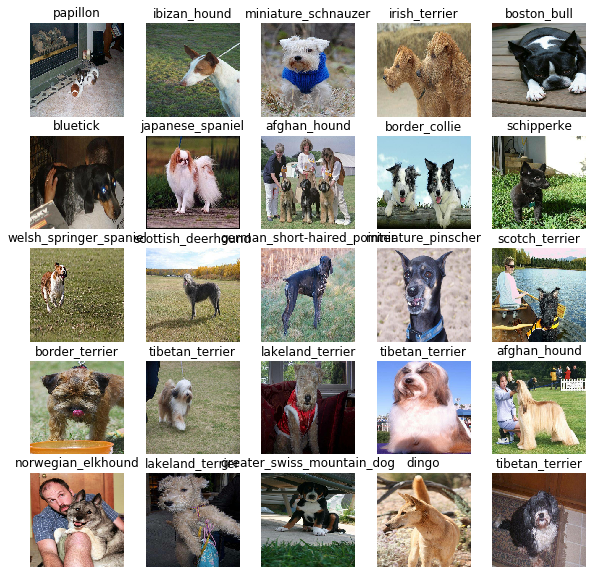

In [55]:
# Now let's visualize the data
show_25_images(train_images,train_labels)
# small images cuz we resized them 
# shuffles each time cuz we called the shuffle function in batch function
# we called the shuffle function because our training data should handle data different each time

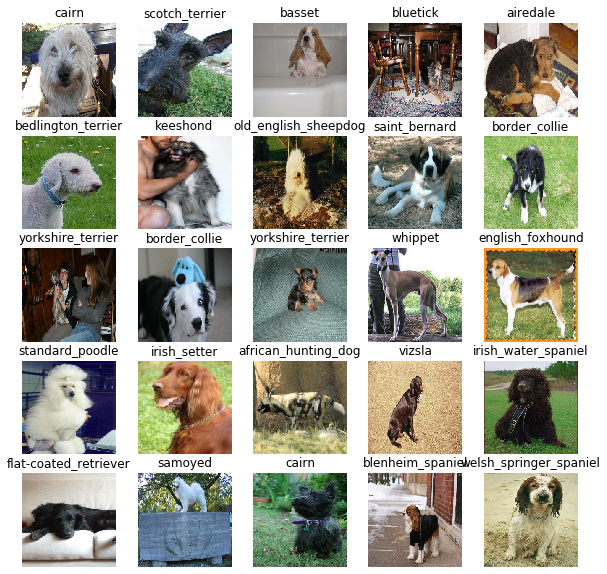

In [56]:
val_images, val_labels=next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

# Building the MODEL

ML model are created by TensorFlow HUB.
Before we build a model there are few things we need to define:
1. Input shape i.e. our tensor shape to our model
2. The output shape (image labels, in the form of tensors) of our model
3. The URL of the model we want to use.

* Models URL: PyTorch, Tensorflow HUB, Model Zoo, papers with code
* Tensorflow Hub: https://tfhub.dev/
* Keras: https://www.tensorflow.org/guide/keras
* Keras Sequential vs Keras Functional

In [57]:
# Setup Input shape to our model 
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3] # Input shape of our image: Batch, height, width Colour channels
# Can think of as the 1st layer of neutral network
#Setup the O/P shape
OUTPUT_SHAPE=len(breed_unique)
#Can think of as the last layer of neural N/W.
MODEL_URL= "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Now we have got out input, output and model ready. Let's put them together in the keras Deep learning model.
Knowing this let's create a function which:
* Take the I/P, O/P and mode as the parameters.
* Defines the layers in KERAS model in sequential fashion. (do this -> Then This-> Then That)
* Compiles the model (say it should be evaluated and improved)
* Builds the model (tell the model the input shape it'll be getting). 
* Return the model

In [58]:
# Function according to the Keras Model
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
    print("Building model withL",model_url)
    
    # Setup model LAyers
    model=tf.keras.Sequential([      #Linear stack of layers(docstring)
        hub.KerasLayer(model_url),     # Layer 1: Input LAyer 1*
        tf.keras.layers.Dense(units=output_shape,activation="softmax"),    # LAyer 2 output layer 2*
                             ])
    # Compile the model
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"]        
    )
    model.build(INPUT_SHAPE)
    return model

### What does the above code does ?
* 1* Telling Hub to create a KerasLayer of model_url.(MobileNetV2 architecture search). From the theory of the later we get that it creates a long single Column matrix. But we don't need that. Therefore we use Dense Function.
* 2* We need our outputs in the shape of 120 Unique elements because we have that many labels. 
       2.1 Softmax: Each component will be an interval of (0,1) and the components wil be add upto 1.
Finally, the things happening are: 
1. We are creating a Keras Sequential : which runs in sequential fashion
2. The first layer is model_url which is actually the MobileNet_v2_arch containing many convolutions which are going to find patterns and features in our input systems. We don't tell the model which all features it should take but it itself decides which all features are to be considered with which priority. After the first layer it gives o/p of 1280 layers.
3. As we need the output of 120 layers only. All the 120 o/p(s) give the sum of 1. The highest value which one is our label.

In [59]:
model=create_model()
model.summary()

Building model withL https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


### What happens on compilation? 

1. Loss(): Our model's goal is to minimize the loss near to 0.Loss is the measure when the model is learning.Measure of how well the model is guessing?
2. Optimizer: How to minimize the loss is the work of Optimizer. `Adam()` optimizer implements adam algo. Performs well on most models. 
3. metrics(): Method of evaluation. How well is your model performing?


Every Algo is trained on an ImageSet you can find it in the Documentation of that model.

### Creating Callbacks


Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stops training early if the model stops improving. 

Tensorflow keras callbacks:Tensorflow Docs

These are for checking what are model is doing. 

We'll create two callbacks, one for Tensorboard which helps track our models progressand another for early stopping which prevents our model to train for too long or overfit.

#### TensorBoard Callbacks
To setup callback , we need to do 3 things:
1. Load the tensorboard extension 
2. Create a tensorboard callback which is able to save logs during the training to a directory and pass it to our model's `fit()` function.
3. Visualize our model's training logs with `%tensorboard` magic function.

In [60]:
# load tensorboard extension
#%load_ext tensorboard

In [61]:
#%pip install keras

In [62]:
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [63]:
import datetime # To access the current date and time

# Create a functin to create a TensorBoard callback
def create_tensorboardcallback():
    # Create a log directory to save tensorboard logs
#     tboard_log_dir = os.path.join("logs",datetime.datetime.now().strftime("%Y%m%D-%H%M%S"))
#     log_dir = TensorBoard(log_dir = tboard_log_dir)
    #log_dir=os.path.join('logs',datetime.datetime.now().strftime("%Y%m%D"))
    log_dir=os.path.join("Logs/",datetime.datetime.now().strftime("%Y%m%D"))  # Logs get tracked whenever the model trains.
    #log_dir = TensorBoard(log_dir = tboard_log_dir)
    return tf.keras.callbacks.TensorBoard(log_dir)  # Tensorboard
    

In [64]:
# Preventing Overfit i.e. Early stopping callback TensorFlow Early Stopping
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

### Training our model (on subset of the data)
Our first model is on 1000 images to make sure everything is working.
No. of Epochs is how many passes our data wants to do.

In [65]:
NUM_EPOCHS=100
# We are giving our model 100 chances to look for our model.

1. Function to train our model
2. Setup Tensorboard callback
3. Fit function on our model,training, validation, no. of epochs and callbacks.
4. Return the model

In [66]:
def train_model():
    #Create a model
    model=create_model()
    # Create tensorboard session
    tensorboard=create_tensorboardcallback()
    
    #Fit the model to the data , passing it the callbacks
    model.fit(x=train_data,
              epochs=NUM_EPOCHS,
              validation_data=val_data,
              validation_freq=1,
              callbacks=[tensorboard,early_stopping])
    return model
    
    # validation freq is no. of times we want our model to be evaluated

In [67]:
model=train_model()

Building model withL https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Train for 22 steps, validate for 10 steps
Epoch 1/100
22/22 [==============================] - 47s 2s/step - loss: 4.7217 - accuracy: 0.0729 - val_loss: 3.7275 - val_accuracy: 0.2200
Epoch 2/100
22/22 [==============================] - 17s 764ms/step - loss: 1.8158 - accuracy: 0.6386 - val_loss: 2.5508 - val_accuracy: 0.4400
Epoch 3/100
22/22 [==============================] - 4s 191ms/step - loss: 0.6426 - accuracy: 0.9343 - val_loss: 2.0011 - val_accuracy: 0.5433
Epoch 4/100
22/22 [==============================] - 4s 175ms/step - loss: 0.2788 - accuracy: 0.9900 - val_loss: 1.7794 - val_accuracy: 0.5733
Epoch 5/100
22/22 [==============================] - 5s 209ms/step - loss: 0.1560 - accuracy: 0.9971 - val_loss: 1.7007 - val_accuracy: 0.5733
Epoch 6/100
22/22 [==============================] - 8s 351ms/step - loss: 0.1047 - accuracy: 0.9971 - val_loss: 1.6454 - val_accuracy: 0.5933
Epoch 7/

As our model has 100% accuracy but the val_accuracy is really low that means our model is not able to perform on the data which it hasn't seen before.
It means that our model is not able to generalize.

### Checking the tensorboard logs
The tensorboard magic function i.e. `%tensorboard` will access the logs directory we created earlier and visualize its contents.

In [68]:
# %tensorboard --logdir 'LOGS/' --host localhost

### Making and evaluating predictions using a trained model 

In [69]:
predictions=model.predict(val_data,
                          verbose=1)
predictions

10/10 [==============================] - 2s 154ms/step


array([[7.8628858e-04, 7.8178418e-06, 9.3859888e-04, ..., 4.1659849e-04,
        2.7836499e-05, 3.3198434e-03],
       [1.9176743e-03, 1.7806083e-04, 1.1839474e-02, ..., 4.9308641e-03,
        2.3555462e-03, 1.5227952e-04],
       [1.8350000e-06, 3.1701484e-06, 7.9674646e-06, ..., 3.4604305e-05,
        9.4633579e-06, 1.1374851e-04],
       ...,
       [1.8795945e-05, 3.7513082e-04, 1.8205617e-05, ..., 6.2373547e-05,
        7.8996352e-05, 3.1875887e-05],
       [9.8925584e-04, 5.8622099e-03, 5.0520333e-03, ..., 2.7612585e-03,
        4.5329039e-03, 3.9331720e-05],
       [5.3284771e-04, 1.3066659e-03, 4.3510710e-04, ..., 1.2239583e-03,
        3.2135244e-03, 2.3862822e-03]], dtype=float32)

In [70]:
predictions.shape

(300, 120)

In [73]:
len(y_val)

300

In [74]:
len(breed_unique)

120

In [75]:
len(predictions[0])

120

In [76]:
predictions[0]

array([7.86288583e-04, 7.81784183e-06, 9.38598881e-04, 5.88626353e-05,
       3.09218041e-04, 3.78527948e-05, 3.07384934e-02, 4.40413423e-04,
       6.06647984e-04, 2.80202366e-04, 2.11212769e-04, 1.73083317e-04,
       2.61062902e-04, 4.35589136e-05, 4.77319409e-04, 3.27277958e-04,
       5.98796869e-05, 1.00324810e-01, 1.74056608e-04, 1.31473760e-04,
       5.27619326e-04, 6.62932929e-04, 4.62786738e-05, 2.95567256e-03,
       1.20969116e-05, 2.90877524e-05, 1.66333899e-01, 6.83507096e-05,
       5.50563796e-04, 2.49975058e-03, 2.11290026e-04, 2.02522366e-04,
       5.29302692e-04, 4.29305328e-05, 2.68877338e-04, 4.63758558e-02,
       7.25565906e-06, 1.34704704e-03, 1.51364629e-05, 6.34229509e-05,
       5.90277079e-04, 1.38294754e-05, 3.94985727e-05, 6.40590326e-04,
       1.34271459e-05, 9.76616357e-05, 8.51309869e-06, 4.91721265e-04,
       1.35340990e-04, 9.33037009e-05, 1.29755805e-04, 2.32942930e-05,
       3.43543012e-04, 9.30761016e-05, 2.47275493e-05, 5.81450295e-05,
      

In [77]:
np.sum(predictions[0])

1.0

In [78]:
np.sum(predictions[1])

1.0

In [84]:
# First Prediction
index=0
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum:{np.sum(predictions[index])}")
print(f"Max Index:{np.argmax(predictions[index])}")
print(f"Predicted label:{breed_unique[np.argmax(predictions[index])]}")

[7.86288583e-04 7.81784183e-06 9.38598881e-04 5.88626353e-05
 3.09218041e-04 3.78527948e-05 3.07384934e-02 4.40413423e-04
 6.06647984e-04 2.80202366e-04 2.11212769e-04 1.73083317e-04
 2.61062902e-04 4.35589136e-05 4.77319409e-04 3.27277958e-04
 5.98796869e-05 1.00324810e-01 1.74056608e-04 1.31473760e-04
 5.27619326e-04 6.62932929e-04 4.62786738e-05 2.95567256e-03
 1.20969116e-05 2.90877524e-05 1.66333899e-01 6.83507096e-05
 5.50563796e-04 2.49975058e-03 2.11290026e-04 2.02522366e-04
 5.29302692e-04 4.29305328e-05 2.68877338e-04 4.63758558e-02
 7.25565906e-06 1.34704704e-03 1.51364629e-05 6.34229509e-05
 5.90277079e-04 1.38294754e-05 3.94985727e-05 6.40590326e-04
 1.34271459e-05 9.76616357e-05 8.51309869e-06 4.91721265e-04
 1.35340990e-04 9.33037009e-05 1.29755805e-04 2.32942930e-05
 3.43543012e-04 9.30761016e-05 2.47275493e-05 5.81450295e-05
 4.95177010e-05 9.32373980e-04 2.10817019e-03 2.61837300e-02
 2.52123107e-04 2.72456055e-05 9.28227557e-04 2.37952681e-05
 3.93966038e-04 2.794400

In [86]:
# As the above o/p is difficult to understand.. Let's visualize it
def get_pred_label(prediction_probs):
    """
    Turns an array of prediction probabailitiers to array.
    """   
    return breed_unique[np.argmax(prediction_probs)]

# Get a predicted label based on a n array of prediction probs 
print(get_pred_label(predictions[74]))

chesapeake_bay_retriever


In [87]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [122]:
# We need to unbatch the file of val_data
def unbatch(data):
    images_=[]
    labels_=[]
# Loop through unbatched data
    for image,label in data.unbatch().as_numpy_iterator():
        images_.append(image)
        labels_.append(breed_unique[np.argmax(label)])
    return images_,labels_
val_images,val_labels=unbatch(val_data)


In [123]:
labels_

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [124]:
val_labels

['cairn',
 'scotch_terrier',
 'basset',
 'bluetick',
 'airedale',
 'bedlington_terrier',
 'keeshond',
 'old_english_sheepdog',
 'saint_bernard',
 'border_collie',
 'yorkshire_terrier',
 'border_collie',
 'yorkshire_terrier',
 'whippet',
 'english_foxhound',
 'standard_poodle',
 'irish_setter',
 'african_hunting_dog',
 'vizsla',
 'irish_water_spaniel',
 'flat-coated_retriever',
 'samoyed',
 'cairn',
 'blenheim_spaniel',
 'welsh_springer_spaniel',
 'scottish_deerhound',
 'komondor',
 'norwich_terrier',
 'cardigan',
 'dingo',
 'dandie_dinmont',
 'walker_hound',
 'walker_hound',
 'mexican_hairless',
 'eskimo_dog',
 'siberian_husky',
 'welsh_springer_spaniel',
 'doberman',
 'mexican_hairless',
 'kuvasz',
 'labrador_retriever',
 'wire-haired_fox_terrier',
 'english_foxhound',
 'collie',
 'toy_poodle',
 'groenendael',
 'boston_bull',
 'standard_poodle',
 'miniature_poodle',
 'chihuahua',
 'staffordshire_bullterrier',
 'vizsla',
 'norfolk_terrier',
 'pug',
 'bedlington_terrier',
 'affenpinsche

In [125]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [128]:
def plot_pred(prediction_probs,labels,images,n=1):
    """
    View the prediction and image for sample n
    """
    pred_prob,true_label,image=prediction_probs[n],labels[n],images[n]
    # get pred label
    pred_label=get_pred_label(pred_prob)
    #PLot images
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    if pred_label==true_label:
        color="green"
    else:
        color="red"
    plt.title("{}{:2.0f}%{}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),color=color)
    

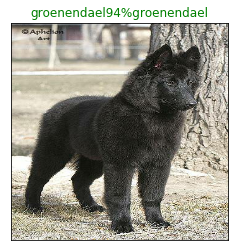

In [131]:
plot_pred(prediction_probs=predictions,
         labels=val_labels,
          images=val_images,n=45)

Now we've got one function to visualize our models top prediction, let's make another to view our modelstop 10 predictions.

This function will:
* Take an input of prediction probabilities array and a ground truth array and a integer 
* Find the prediction using `get_pred_label()`
* Find the top 10:
    * Prediction probabailities index
    * Prediction probabailities values
    * Prediction labels
* Plot the top 10 prediction probability values and labels, colouring the truth label green.

In [143]:
def plot_pred_conf(prediction_probs,labels, n=1):
    """
    Plus the top 10 highest prediction confiedences along with the truth label for sample n.
    """
    pred_prob,true_label=prediction_probs[n],labels[n]
    # get pred label
    pred_label=get_pred_label(pred_prob)
    #top 10 prediction connfidence indexes
    top_10_pred_index=pred_prob.argsort()[-10:][::-1]
    top_10_pred_values=pred_prob[top_10_pred_index]
    # find the top 10 prediction labels
    top_10_pred_labels=breed_unique[top_10_pred_index]
    
    
    top_plot=plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="pink")
    plt.xticks(np.arange(len(top_10_pred_labels)),
              labels=top_10_pred_labels,
              rotation="vertical")
    if np.isin(true_label,top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels==true_label)].set_color("green")
    else:
        pass

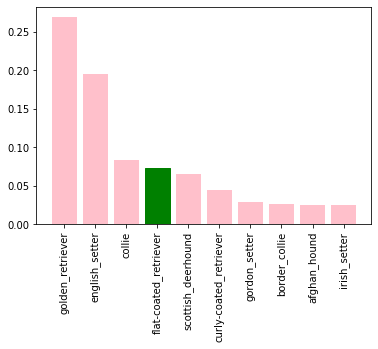

In [145]:
plot_pred_conf(prediction_probs=predictions,
               labels=val_labels,n=20)

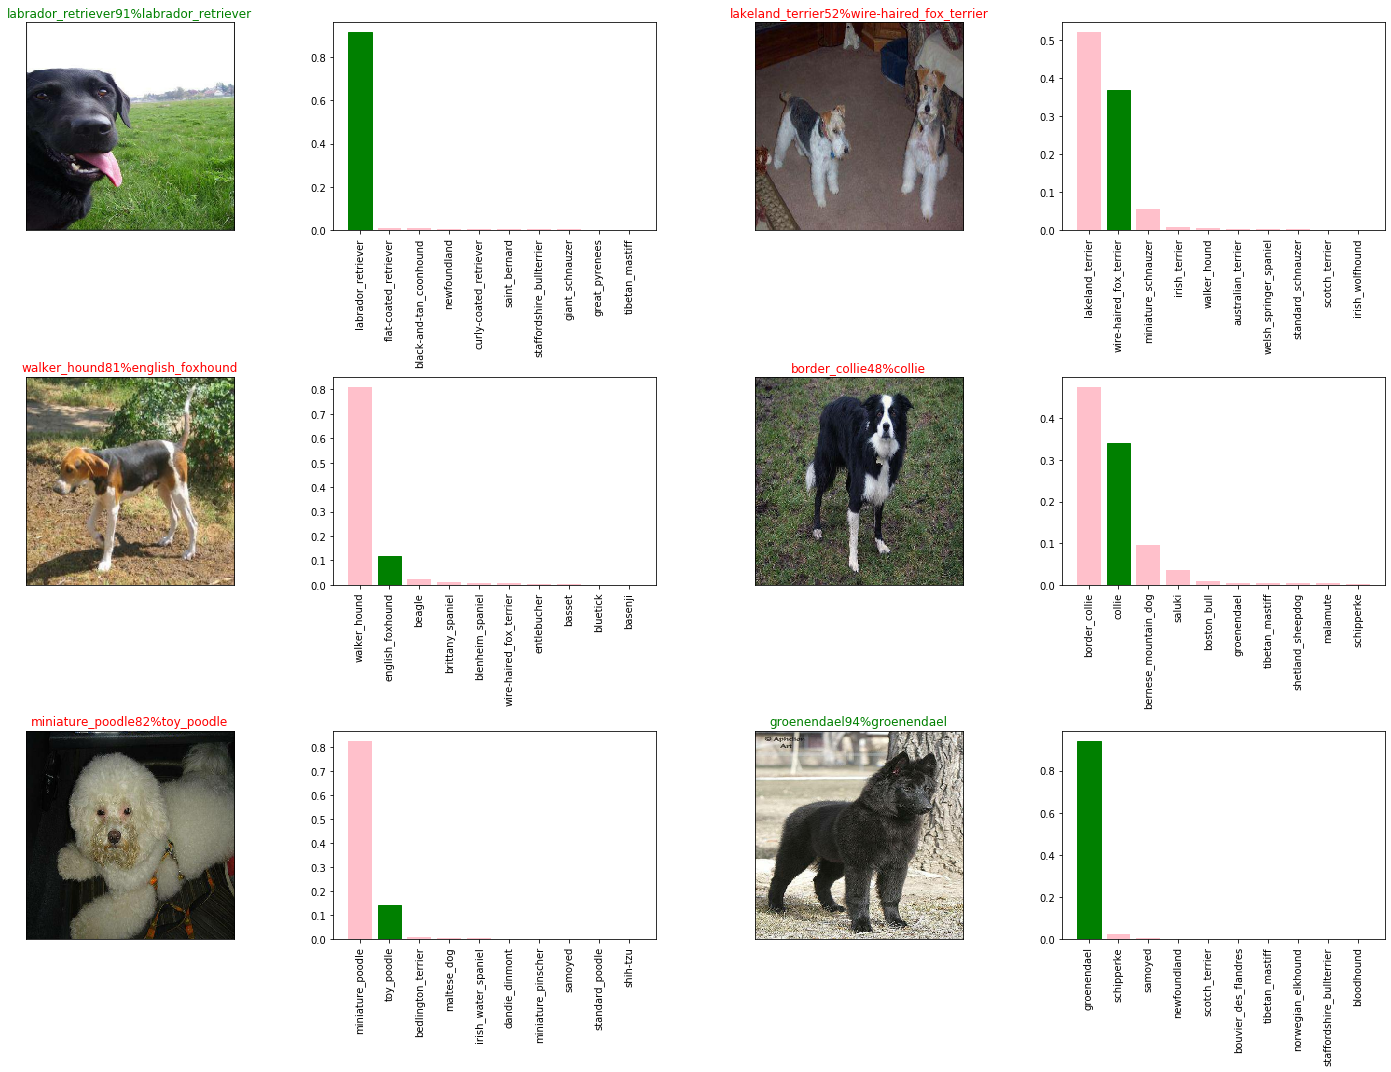

In [157]:
i_multiplier=40 # next multiple images
num_rows=3
num_columns=2
num_images=num_columns*num_rows
plt.figure(figsize=(10*num_columns,5*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_columns,2*i+1)
    plot_pred(prediction_probs=predictions,
              labels=val_labels,
              images=val_images,
              n=i+i_multiplier)
    plt.subplot(num_rows,2*num_columns,2*i+2)
    plot_pred_conf(prediction_probs=predictions,
                   labels=val_labels,
                   n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)    
plt.show()

In [160]:
# %pip install -q pyyaml h5py

Note: you may need to restart the kernel to use updated packages.


In [180]:
def save_model(model,suffix=None):
    """
    Saves a given model in a models directory and appends a suffix(string)
    """
    # Creates a model directory pathname with current time
    modeldir=os.path.join('Models',"Multiclass")
    model_path=modeldir+"-"+suffix+".h5"   #save format of a model
    print(f"Saving model:{model_path}")
    model.save(model_path)
    return model_path

In [185]:
# load the model
def load_model(model_path):
    new_model=tf.keras.models.load_model(model_path,
                                         custom_objects={"KerasLayer":hub.KerasLayer}) #custom layer include it Layer 1 i.e. I/P laye
    return new_model
    

In [183]:
save_model(model,suffix="1000-images-mobilenetv2-Adam")

Saving model:Models\Multiclass-1000-images-mobilenetv2-Adam.h5


'Models\\Multiclass-1000-images-mobilenetv2-Adam.h5'

In [186]:
loaded_model=load_model("Models/Multiclass-1000-images-mobilenetv2-Adam.h5")

In [187]:
# Evaluate the pre-saved model
model.evaluate(val_data)  

10/10 [==============================] - 1s 118ms/step - loss: 1.4902 - accuracy: 0.6367


[1.490220272541046, 0.63666666]

In [188]:
#Evaluate the new model
loaded_model.evaluate(val_data)

10/10 [==============================] - 2s 165ms/step - loss: 1.4902 - accuracy: 0.6367


[1.490220272541046, 0.63666666]

 ## Doing all this on FULL DATA


In [189]:
len(X),len(y)

(10222, 10222)

In [190]:
full_data=create_data_batches(X,y)

Creating training data batches...
Completed Training data...


In [191]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [192]:
full_model=create_model()

Building model withL https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [193]:
# create full_model callback
full_model_tensorboard = create_tensorboardcallback()
# No validation set
full_model_early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=3)

In [195]:
full_model.fit(x=full_data, epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard,full_model_early_stopping])

Train for 320 steps
Epoch 1/100
320/320 [==============================] - 151s 473ms/step - loss: 1.3525 - accuracy: 0.6634
Epoch 2/100
320/320 [==============================] - 37s 117ms/step - loss: 0.4015 - accuracy: 0.8810
Epoch 3/100
320/320 [==============================] - 37s 117ms/step - loss: 0.2354 - accuracy: 0.9366
Epoch 4/100
320/320 [==============================] - 37s 117ms/step - loss: 0.1577 - accuracy: 0.9640
Epoch 5/100
320/320 [==============================] - 38s 117ms/step - loss: 0.1063 - accuracy: 0.9796
Epoch 6/100
320/320 [==============================] - 38s 118ms/step - loss: 0.0764 - accuracy: 0.9865
Epoch 7/100
320/320 [==============================] - 38s 117ms/step - loss: 0.0590 - accuracy: 0.9915
Epoch 8/100
320/320 [==============================] - 37s 117ms/step - loss: 0.0472 - accuracy: 0.9933
Epoch 9/100
320/320 [==============================] - 37s 117ms/step - loss: 0.0388 - accuracy: 0.9955
Epoch 10/100
320/320 [=====================

In [196]:
save_model(full_model,suffix="10000-images-mobilenetv2-Adam")

Saving model:Models\Multiclass-10000-images-mobilenetv2-Adam.h5


'Models\\Multiclass-10000-images-mobilenetv2-Adam.h5'

In [197]:
loaded_full_model=load_model("Models/Multiclass-10000-images-mobilenetv2-Adam.h5")

## Make predictions on test set

Since our model is trained on tensor batches we need test data in same format.
We have creaets `create_data_batches()` earlier which can take a list of filenames as input and convert them into Tensor batches.

To make predictions on the test data we'll:
* Get the test images filenames.
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `TRUE`( since the data doesn't have labels.
* Make predictions array by passing the test batches to the `predict()` method called on our model.

In [203]:
test_path="Data/dog-breed-identification/test/"
test_filenames=[test_path + fname for fname in os.listdir(test_path)]
len(test_filenames)

10357

In [204]:
test_batches=create_data_batches(test_filenames, test_data=True)

Creating test data batches...
Completed Test data...


In [205]:
test_batches

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [206]:
test_predictions=loaded_full_model.predict(test_batches,
                                           verbose=1)

324/324 [==============================] - 41s 127ms/step


In [210]:
np.savetxt('Data/dog-breed-identification/test_predictions.csv',test_predictions,delimiter=",")

In [211]:
np.loadtxt('Data/dog-breed-identification/test_predictions.csv',delimiter=",")

array([[1.11117747e-11, 6.05367449e-12, 7.02718481e-15, ...,
        9.55740343e-14, 8.26772761e-10, 1.96106898e-11],
       [8.67748440e-06, 9.94676839e-07, 8.47412593e-08, ...,
        1.03686892e-10, 2.42761047e-07, 5.38173461e-09],
       [8.72970932e-11, 2.93645417e-06, 7.13575998e-09, ...,
        1.58759548e-07, 2.56133864e-11, 1.54207012e-11],
       ...,
       [5.74359866e-08, 1.04586322e-08, 4.36994327e-07, ...,
        2.40868991e-11, 3.09896222e-06, 2.81801316e-09],
       [9.03975742e-05, 9.46734247e-07, 7.87372034e-09, ...,
        1.75940607e-09, 1.37153975e-05, 6.01740212e-05],
       [2.67573377e-08, 1.52447524e-06, 6.58101726e-07, ...,
        1.64589495e-03, 2.34187851e-08, 1.40059742e-10]])

In [212]:
test_predictions.shape

(10357, 120)

In [225]:
# Preparing our daata for kaggle
pred_pd=pd.DataFrame(columns=["id"]+ list(breed_unique))
pd.set_option('display.max_columns',121)
pd.set_option('display.max_rows',121)
pred_pd.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

In [232]:
test_ids=[os.path.splitext(path)[0] for path in os.listdir(test_path)]
test_ids[:5]

['000621fb3cbb32d8935728e48679680e',
 '00102ee9d8eb90812350685311fe5890',
 '0012a730dfa437f5f3613fb75efcd4ce',
 '001510bc8570bbeee98c8d80c8a95ec1',
 '001a5f3114548acdefa3d4da05474c2e']

In [234]:
pred_pd["id"]=test_ids

In [235]:
pred_pd.head(3)

id affenpinscher afghan_hound  \
0  000621fb3cbb32d8935728e48679680e           NaN          NaN   
1  00102ee9d8eb90812350685311fe5890           NaN          NaN   
2  0012a730dfa437f5f3613fb75efcd4ce           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset beagle bedlington_terrier  \
0                NaN     NaN    NaN    NaN                NaN   
1                NaN     NaN    NaN    NaN                NaN   
2                NaN     NaN    NaN    NaN                NaN   

  bernese_mountain_dog black-and-tan_coonhound blenheim_spaniel bloodhound  \
0                  NaN                     NaN              NaN        NaN   
1                  NaN                     NaN              NaN        NaN   
2                  NaN                     NaN              NaN        NaN   

  bluetick border_collie border_terrier borzoi boston_bull  \
0      NaN           NaN            NaN    NaN         NaN   
1      NaN           NaN            NaN    NaN         NaN   
2      NaN           NaN            NaN    NaN         NaN   

  bouvier_des_flandres boxer brabancon_griffon briard brittany_spaniel  \
0                  NaN   NaN               NaN    NaN              NaN   
1                  NaN   NaN               NaN    NaN              NaN   
2                  NaN   NaN               NaN    NaN              NaN   

  bull_mastiff cairn cardigan chesapeake_bay_retriever chihuahua chow clumber  \
0          NaN   NaN      NaN                      NaN       NaN  NaN     NaN   
1          NaN   NaN      NaN                      NaN       NaN  NaN     NaN   
2          NaN   NaN      NaN                      NaN       NaN  NaN     NaN   

  cocker_spaniel collie curly-coated_retriever dandie_dinmont dhole dingo  \
0            NaN    NaN                    NaN            NaN   NaN   NaN   
1            NaN    NaN                    NaN            NaN   NaN   NaN   
2            NaN    NaN                    NaN            NaN   NaN   NaN   

  doberman english_foxhound english_setter english_springer entlebucher  \
0      NaN              NaN            NaN              NaN         NaN   
1      NaN              NaN            NaN              NaN         NaN   
2      NaN              NaN            NaN              NaN         NaN   

  eskimo_dog flat-coated_retriever french_bulldog german_shepherd  \
0        NaN                   NaN            NaN             NaN   
1        NaN                   NaN            NaN             NaN   
2        NaN                   NaN            NaN             NaN   

  german_short-haired_pointer giant_schnauzer golden_retriever gordon_setter  \
0                         NaN             NaN              NaN           NaN   
1                         NaN             NaN              NaN           NaN   
2                         NaN             NaN              NaN           NaN   

  great_dane great_pyrenees greater_swiss_mountain_dog groenendael  \
0        NaN            NaN                        NaN         NaN   
1        NaN            NaN                        NaN         NaN   
2        NaN            NaN                        NaN         NaN   

  ibizan_hound irish_setter irish_terrier irish_water_spaniel irish_wolfhound  \
0          NaN          NaN           NaN                 NaN             NaN   
1          NaN          NaN           NaN                 NaN             NaN   
2          NaN          NaN           NaN                 NaN             NaN   

  italian_greyhound japanese_spaniel keeshond kelpie kerry_blue_terrier  \
0               NaN              NaN      NaN    NaN                NaN   
1               NaN              NaN      NaN    N

In [236]:
# Add the predictions to each columns
pred_pd[list(breed_unique)]=test_predictions

In [237]:
pred_pd.head(3)

id affenpinscher afghan_hound  \
0  000621fb3cbb32d8935728e48679680e   1.11118e-11  6.05367e-12   
1  00102ee9d8eb90812350685311fe5890   8.67748e-06  9.94677e-07   
2  0012a730dfa437f5f3613fb75efcd4ce   8.72971e-11  2.93645e-06   

  african_hunting_dog     airedale american_staffordshire_terrier  \
0         7.02718e-15  2.76489e-13                    2.64688e-13   
1         8.47413e-08  8.38991e-09                    4.37852e-06   
2         7.13576e-09  5.88078e-11                    2.86282e-10   

   appenzeller australian_terrier      basenji       basset       beagle  \
0  1.24995e-11         1.9644e-16  3.15656e-13   1.4311e-13  4.12063e-11   
1  2.58087e-08        3.79868e-06  5.88641e-07  5.44964e-08  1.56209e-07   
2  8.85068e-09        9.45995e-12  1.12662e-11  3.37931e-09  3.17675e-12   

  bedlington_terrier bernese_mountain_dog black-and-tan_coonhound  \
0        5.13122e-14          5.16184e-12             8.83043e-13   
1        4.74381e-08          3.16413e-07             9.75502e-06   
2        1.37434e-10          3.90969e-10             8.56168e-10   

  blenheim_spaniel   bloodhound     bluetick border_collie border_terrier  \
0      7.67256e-10  1.14976e-13   2.3155e-12   3.46558e-14    6.07506e-14   
1      1.39222e-07  2.84916e-06  7.73536e-08   7.52713e-06    2.73652e-09   
2      1.33669e-07  2.78735e-11  3.23584e-07   6.32975e-11     7.8014e-12   

        borzoi  boston_bull bouvier_des_flandres        boxer  \
0  2.00298e-11  2.62999e-12          3.22726e-14    1.021e-11   
1   1.7764e-06  1.52112e-07          5.65429e-09  1.01992e-05   
2   0.00111808  5.87617e-12          3.26373e-10  1.80324e-07   

  brabancon_griffon       briard brittany_spaniel bull_mastiff        cairn  \
0        2.9944e-12  1.14331e-14      1.07241e-13  1.26469e-10  2.00245e-13   
1       1.50821e-08   1.0672e-08      5.55628e-07  4.47347e-06  1.16382e-08   
2       4.07375e-11  8.19042e-07      8.73307e-08  1.12486e-09   2.3258e-10   

      cardigan chesapeake_bay_retriever    chihuahua         chow  \
0  2.20435e-16              2.27234e-15  8.13676e-12  1.58804e-13   
1  3.09894e-06              5.70854e-08  3.66079e-09   0.00397769   
2  2.09563e-11              7.19308e-10  5.51424e-12  7.52334e-12   

       clumber cocker_spaniel       collie curly-coated_retriever  \
0  7.20422e-13    2.79026e-13  1.57106e-10            1.25898e-15   
1  6.13829e-07    6.51104e-07  6.60896e-05            1.05647e-07   
2  2.25503e-06    3.51628e-08  1.75433e-09            1.06985e-08   

  dandie_dinmont        dhole        dingo     doberman english_foxhound  \
0    2.09341e-16  2.67816e-12  5.28354e-14  3.69638e-13      1.38247e-09   
1     1.0266e-07  0.000194196  1.01129e-05  7.16845e-06      1.44456e-08   
2    4.27468e-10  3.00313e-11  6.20056e-11  2.09073e-07      4.19631e-09   

  english_setter english_springer  entlebucher   eskimo_dog  \
0    6.77889e-12      3.99059e-14  1.96591e-12  4.79898e-15   
1    3.55945e-08      1.08073e-07   2.9137e-07    0.0172571   
2       0.998684      0.000152573  2.61306e-06   2.0906e-13   

  flat-coated_retriever french_bulldog german_shepherd  \
0           6.94628e-12    1.79615e-10     7.60541e-13   
1           6.13188e-08    4.37466e-06     0.000343595   
2           1.44736e-06    1.26538e-11     3.20439e-11   

  german_short-haired_pointer giant_schnauzer golden_retriever gordon_setter  \
0                 8.77888e-12     2.51757e-12      1.07748e-12   4.28569e-13   
1                 1.63198e-08     7.02184e-09      4.06474e-07   5.07566e-06   
2                  8.6979e-07     6.38454e-10      6.92495e-07   2.40785e-07   

    great_dane great_pyrenees greater_swiss_mountain_dog  groenendael  \
0  2.78668e-12    6.53599e-12                2.76046e-14  2.38086e-12   
1  8.81689e-09     1.0732e-05                2.02505e-06   0.00020317   
2  4.01247e-06    1.24668e-06                 6.6863e-10  1.47615e-10   

  ibizan_hound irish_setter irish_terrier irish_water_spaniel i

In [238]:
pred_pd.to_csv("Data/dog-breed-identification/Final_Submission_Kaggle_mobilNetV2_FullModel.csv", index=False)

## Making predictions on custom data
    
To make predictions on custom images we'll:
* Get the filepaths of our own images
* Turn the filepaths into data batches using `creat_data_batches()`. And since our custom images won't have labels, we set the `test_data` parameter to `True`.
* Pass the custom image data batch to our model's predict() method.
* Convert the prediction output probabilities to prediction labels
* Compare the predicted labels to the custom images.

custom_path="Data/Myphotos"
custom_image=[custom_path + fname for fname in os.listdir(custom_path)]

custom_data=create_data_batches(custom_image,test_data=True)

custom_preds=full_model.predict(custom_data)

custom_pred_labels=[get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]